<a href="https://colab.research.google.com/github/nsalazard/EFM-analisis-de-datos-/blob/main/EFM_S8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gspread
import pandas as pd
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm, linregress
from scipy.signal import find_peaks
import matplotlib.colors as mcolors
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/17nyCCFNaGNIRS3FxdIYe_b6q78L5J7nCcMIup-uXb2Q/edit#gid=1769877899')
worksheet=wb.worksheet('T0')
rows = worksheet.get_all_values()
d1=pd.DataFrame(rows)
titles=pd.DataFrame(rows)
d1.columns = d1.iloc[1]
titles=titles.iloc[1:2]
d1 = d1.iloc[2:]
d1.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1,I3 [u.a],V3 [V],I2.5 [u.a],V2.5 [V],I2 [u.a],V2 [V],I1.5 [u.a],V1.5 [V],I1 [u.a],V1 [V],I0.5[u.a],V0.5 [V],I0 [u.a],V0 [V]
2,0.2280,0.0450,0.2250,0.0450,0.2280,0.0450,0.2265,0.0450,0.2265,0.0450,0.2265,0.0450,0.2280,0.0450
3,0.2280,0.0450,0.2250,0.0450,0.2280,0.0450,0.2265,0.0450,0.2265,0.0450,0.2265,0.0450,0.2280,0.0450
4,0.2280,0.0450,0.2250,0.0450,0.2280,0.0450,0.2265,0.0450,0.2280,0.0450,0.2265,0.0450,0.2280,0.0450
5,0.2280,0.0450,0.2250,0.0450,0.2280,0.0450,0.2250,0.0450,0.2280,0.0450,0.2265,0.0450,0.2280,0.0450
6,0.2295,0.0450,0.2250,0.0450,0.2280,0.0450,0.2265,0.0450,0.2280,0.0450,0.2265,0.0450,0.2265,0.0450


In [ ]:
nombres=d1.columns[0:14]
for name in nombres:
  d1[name]= pd.to_numeric(d1[name])

In [ ]:
d1.columns[0:14]

Index(['I3  [u.a]', 'V3 [V]', 'I2.5 [u.a]', 'V2.5 [V]', 'I2  [u.a]', 'V2 [V]',
       'I1.5 [u.a]', 'V1.5 [V]', 'I1 [u.a]', 'V1 [V]', 'I0.5[u.a]', 'V0.5 [V]',
       'I0 [u.a]', 'V0 [V]'],
      dtype='object', name=1)

In [ ]:
#Funciones
def f1(x,a,b):
  return a*x+b

def ERROR(x,y,m,b):
  N = np.size(x)
  Sx,Sy,Sxx,Syy,e,em,eb,z = 0,0,0,0,0,0,0,0
  for i in range (N-1):
    Sx += x[i]
    Sy += y[i] 
    Sxx += x[i]*x[i]
    Syy += y[i]*y[i]
    z += (b+ m*x[i] - y[i])**2
  e = np.sqrt(z/((N*Sxx -Sx*Sx)*(N-2)))
  em = np.sqrt(N)*e
  eb = np.sqrt(Sxx)*e

  return (em, eb)

In [ ]:
#Ciclo for
pot= [3.0,2.5,2.0,1.5,1.0,0.5,0.0]

#T0

Text(0.5, 1.0, 'I vs V para distintos valores de Vr a T0')

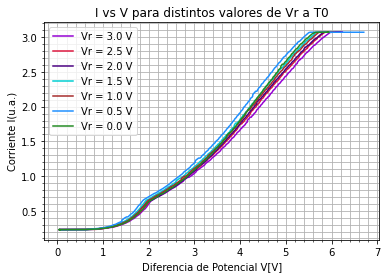

In [ ]:
lim = [261,296,255,282,252,331,249]
Farben= ["darkviolet","crimson","indigo","darkturquoise","brown","dodgerblue", "forestgreen"]

for ii in range(7): 
  valx1=d1.loc[:lim[ii],d1.columns[2*ii+1]]
  valy1=d1.loc[:lim[ii],d1.columns[2*ii]]
  x1=valx1.values 
  y1=valy1.values
  plt.plot(x1, y1,color=Farben[ii],label='Vr = %.1f V' % pot[ii])


#plt.scatter(x1,y1,color="black",s=12)
plt.minorticks_on()
plt.grid(b=True,which="both")


plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("Corriente I(u.a.)")
plt.xlabel("Diferencia de Potencial V[V]")
plt.title("I vs V para distintos valores de Vr a T0")

#TMax

In [ ]:
worksheet1=wb.worksheet('Tmax')
rows1 = worksheet1.get_all_values()
df1=pd.DataFrame(rows1)
titles1=pd.DataFrame(rows1)
df1.columns = df1.iloc[1]
titles=titles.iloc[1:2]
df1 = df1.iloc[2:]
df1.head()

1,I3 [u.a],V3 [V],I2.5 [u.a],V2.5 [V],I2 [u.a],V2 [V],I1.5 [u.a],V1.5 [V],I1 [u.a],V1 [V],I0.5[u.a],V0.5 [V],I0 [u.a],V0 [V]
2,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150
3,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3750,-0.0270,0.3150
4,-0.0270,0.3150,-0.0270,0.3300,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.5550,-0.0270,0.3150
5,-0.0270,0.3150,-0.0270,0.4500,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.7200,-0.0270,0.3150
6,-0.0270,0.3150,-0.0270,0.6300,-0.0270,0.3750,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.9000,-0.0270,0.3300


In [ ]:
nombres=df1.columns[0:14]
for name in nombres:
  df1[name]= pd.to_numeric(df1[name])

Vr = 3.0 [17.13  21.855 26.64 ]
Vr = 2.5 [12.78  17.145 21.87  26.745]
Vr = 2.0 [12.945 17.1   21.9   26.82 ]
Vr = 1.5 [12.66  17.145 21.915 26.835]
Vr = 1.0 [12.525 17.115 21.915 26.835]
Vr = 0.5 [12.51 17.01 21.9  26.85]
Vr = 0.0 [12.54  17.04  21.915 26.835]


Text(0.5, 1.0, 'I vs V para distintos valores de Vr a Tmax')

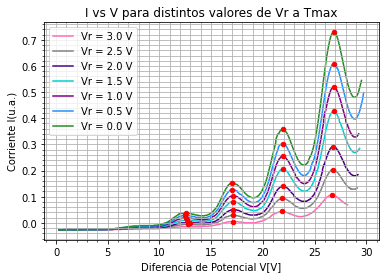

In [ ]:
lim = [367,371,374,390,380,390,386]
Farben= ["hotpink","gray","indigo","darkturquoise","purple","dodgerblue", "forestgreen"]
fig = plt.figure()
ax = fig.subplots()
ax.minorticks_on()
ax.grid(b=True,which="both", zorder=-1)
for ii in range(7): 
  valx1=df1.loc[:lim[ii],df1.columns[2*ii+1]]
  valy1=df1.loc[:lim[ii],df1.columns[2*ii]]
  x1=valx1.values 
  y1=valy1.values

  #Find peaks
  peaks = find_peaks(y1, height = -0.01)
  height = y1[peaks[0]] #list of the heights of the peaks
  peak_pos = x1[peaks[0]] #list of the peaks positions

  ax.plot(x1, y1,color=Farben[ii],label='Vr = %.1f V' % pot[ii], zorder=1)
  ax.scatter(peak_pos, height, color = "red", s = 20, marker = 'o', zorder=2)
  print("Vr = %.1f" % pot[ii], end = " " )
  print(x1[peaks[0]])


plt.legend(loc="upper left") 
#plt.scatter(x1,y1,color="black",s=12)
plt.ylabel("Corriente I(u.a.)")
plt.xlabel("Diferencia de Potencial V[V]")
plt.title("I vs V para distintos valores de Vr a Tmax")

Vr = 3.0 [18.705 23.64 ]
Vr = 2.5 [13.83  18.96  23.835 28.725]
Vr = 2.0 [14.085 19.08  24.03  28.875]
Vr = 1.5 [14.13  19.185 23.985 28.89 ]
Vr = 1.0 [14.1   19.095 23.985 28.89 ]
Vr = 0.5 [14.19  19.065 23.97  28.845]
Vr = 0.0 [14.115 19.02  23.985 28.83 ]


Text(0.5, 1.0, 'I vs V para distintos valores de Vr a Tmax')

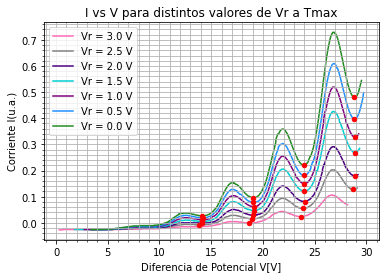

In [ ]:
lim = [367,371,374,390,380,390,386]
Farben= ["hotpink","gray","indigo","darkturquoise","purple","dodgerblue", "forestgreen"]
fig = plt.figure()
ax = fig.subplots()
ax.minorticks_on()
ax.grid(b=True,which="both", zorder=-1)
for ii in range(7): 
  valx1=df1.loc[25:lim[ii],df1.columns[2*ii+1]]
  valy1=df1.loc[25:lim[ii],df1.columns[2*ii]]
  x1=valx1.values 
  y1=valy1.values
  ys = -1 * y1

  #Find peaks
  peaks = find_peaks(ys)
  height = y1[peaks[0]] #list of the heights of the peaks
  peak_pos = x1[peaks[0]] #list of the peaks positions

  ax.plot(x1, y1,color=Farben[ii],label='Vr = %.1f V' % pot[ii], zorder=1)
  ax.scatter(peak_pos, height, color = "red", s = 20, marker = 'o', zorder=2)
  print("Vr = %.1f" % pot[ii], end = " " )
  print(x1[peaks[0]])


plt.legend(loc="upper left") 
#plt.scatter(x1,y1,color="black",s=12)
plt.ylabel("Corriente I(u.a.)")
plt.xlabel("Diferencia de Potencial V[V]")
plt.title("I vs V para distintos valores de Vr a Tmax")

#Tmin

In [ ]:
worksheet2=wb.worksheet('Tmin')
rows2 = worksheet2.get_all_values()
df2=pd.DataFrame(rows2)
titles2=pd.DataFrame(rows2)
df2.columns = df2.iloc[1]
titles=titles.iloc[1:2]
df2 = df2.iloc[2:]
df2.head()

1,I3 [u.a],V3 [V],I2.5 [u.a],V2.5 [V],I2 [u.a],V2 [V],I1.5 [u.a],V1.5 [V],I1 [u.a],V1 [V],I0.5[u.a],V0.5 [V],I0 [u.a],V0 [V]
2,-0.0270,0.3600,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,2.4900,-0.0270,0.3150
3,-0.0255,0.5400,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,2.6550,-0.0270,0.3150
4,-0.0255,0.7050,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,2.8200,-0.0270,0.3150
5,-0.0255,0.8700,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,0.3150,-0.0270,2.9700,-0.0270,0.3150
6,-0.0255,1.0500,-0.0270,0.3150,-0.0255,0.3150,-0.0270,0.3150,-0.0270,0.3900,-0.0270,3.1350,-0.0270,0.3150


In [ ]:
nombres=df2.columns[0:14]
for name in nombres:
  df2[name]= pd.to_numeric(df2[name])

Vr = 3.0 [17.01  21.81  26.685]
Vr = 2.5 [12.495 17.1   21.9   26.85 ]
Vr = 2.0 [12.45  17.055 21.93  26.91 ]
Vr = 1.5 [12.525 17.04  21.975 26.955]
Vr = 1.0 [12.315 17.055 21.99  26.955]
Vr = 0.5 [12.36  16.995 21.945 27.015]
Vr = 0.0 [12.315 17.04  21.975 27.03 ]


Text(0.5, 1.0, 'I vs V para distintos valores de Vr a Tmin')

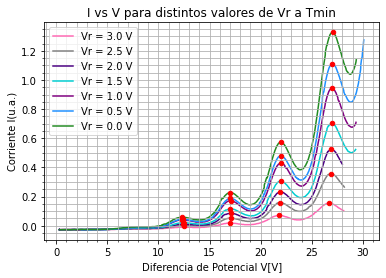

In [ ]:
lim = [338,352,443,392,378,389,380]
Farben= ["hotpink","gray","indigo","darkturquoise","purple","dodgerblue", "forestgreen"]
fig = plt.figure()
ax = fig.subplots()
ax.minorticks_on()
ax.grid(b=True,which="both", zorder=-1)
for ii in range(7): 
  valx1=df2.loc[:lim[ii],df2.columns[2*ii+1]]
  valy1=df2.loc[:lim[ii],df2.columns[2*ii]]
  x1=valx1.values 
  y1=valy1.values

  #Find peaks
  peaks = find_peaks(y1, height = 0.0)
  height = y1[peaks[0]] #list of the heights of the peaks
  peak_pos = x1[peaks[0]] #list of the peaks positions

  ax.plot(x1, y1,color=Farben[ii],label='Vr = %.1f V' % pot[ii], zorder=1)
  ax.scatter(peak_pos, height, color = "red", s = 20, marker = 'o', zorder=2)

  print("Vr = %.1f" % pot[ii], end = " " )
  print(x1[peaks[0]])

plt.legend(loc="upper left") 
#plt.scatter(x1,y1,color="black",s=12)
plt.ylabel("Corriente I(u.a.)")
plt.xlabel("Diferencia de Potencial V[V]")
plt.title("I vs V para distintos valores de Vr a Tmin")

V = 0

Text(0.5, 1.0, 'Potencial de Retardo V = 3.0 [V]')

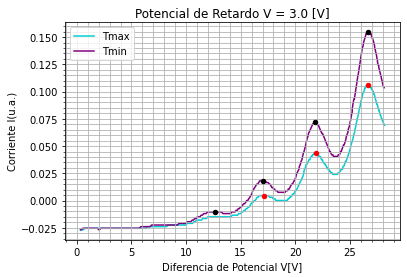

In [ ]:
Farben= ["hotpink","gray","indigo","darkturquoise","purple","dodgerblue", "forestgreen"]
fig = plt.figure()
ax = fig.subplots()
ax.minorticks_on()
ax.grid(b=True,which="both", zorder=-1)

valx1=df1.loc[:367,df1.columns[1]]
valy1=df1.loc[:367,df1.columns[0]]
x1=valx1.values 
y1=valy1.values

valx2=df2.loc[:338,df2.columns[1]]
valy2=df2.loc[:338,df2.columns[0]]
x2=valx2.values 
y2=valy2.values

peaks = find_peaks(y1)
height = y1[peaks[0]] #list of the heights of the peaks
peak_pos = x1[peaks[0]] #list of the peaks positions

peaks2 =  find_peaks(y2, height = -0.024)
height2 = y2[peaks2[0]] #list of the heights of the peaks
peak_pos2 = x2[peaks2[0]] #list of the peaks positions

ax.plot(x1, y1,color=Farben[3],label='Tmax', zorder=1)
ax.plot(x2, y2,color=Farben[4],label='Tmin', zorder=1)
ax.scatter(peak_pos, height, color = "red", s = 20, marker = 'o', zorder=2)
ax.scatter(peak_pos2, height2, color = "black", s = 20, marker = 'o', zorder=2)

plt.legend(loc="upper left") 
plt.ylabel("Corriente I(u.a.)")
plt.xlabel("Diferencia de Potencial V[V]")
plt.title("Potencial de Retardo V = 3.0 [V]")

Text(0.5, 1.0, 'Potencial de Retardo V = 0.0 [V]')

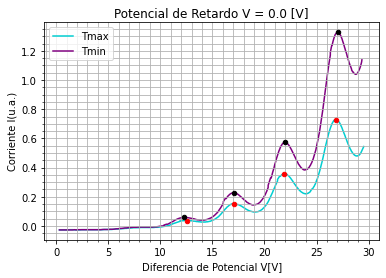

In [ ]:
Farben= ["hotpink","gray","indigo","darkturquoise","purple","dodgerblue", "forestgreen"]
fig = plt.figure()
ax = fig.subplots()
ax.minorticks_on()
ax.grid(b=True,which="both", zorder=-1)

valx1=df1.loc[:386,df1.columns[13]]
valy1=df1.loc[:386,df1.columns[12]]
x1=valx1.values 
y1=valy1.values

valx2=df2.loc[:380,df2.columns[13]]
valy2=df2.loc[:380,df2.columns[12]]
x2=valx2.values 
y2=valy2.values

peaks = find_peaks(y1, height = 0.0)
height = y1[peaks[0]] #list of the heights of the peaks
peak_pos = x1[peaks[0]] #list of the peaks positions

peaks2 = find_peaks(y2, height = 0.05)
height2 = y2[peaks2[0]] #list of the heights of the peaks
peak_pos2 = x2[peaks2[0]] #list of the peaks positions

ax.plot(x1, y1,color=Farben[3],label='Tmax', zorder=1)
ax.plot(x2, y2,color=Farben[4],label='Tmin', zorder=1)
ax.scatter(peak_pos, height, color = "red", s = 20, marker = 'o', zorder=2)
ax.scatter(peak_pos2, height2, color = "black", s = 20, marker = 'o', zorder=2)

plt.legend(loc="upper left") 
plt.ylabel("Corriente I(u.a.)")
plt.xlabel("Diferencia de Potencial V[V]")
plt.title("Potencial de Retardo V = 0.0 [V]")